In [1]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot     as     plt
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
from    statsmodels.stats.power import  ttest_power


In [2]:
import numpy as np
import pandas as pd

In [5]:
## Data Load
Columns=pd.read_csv('columns.csv')
Responses=pd.read_csv('responses.csv')


In [15]:
#Data Cleansing

#Considering only the following relevant columns

resp=Responses[['Finances','Gender','Healthy eating','Village - town']]
resp.head()

resp_final=resp.dropna()

print('Missing values are removed \n\n',resp_final.isnull().sum())
resp_final.shape
resp_final.head(1000)

print('Removing ouliers')
q1=resp_final.quantile(0.25)
q3 = resp_final.quantile(0.75)
iqr = q3 - q1
outlier_min = q1  - 1.5*iqr
outlier_max = q3 + 1.5*iqr
resp_final = resp_final[~(((resp_final < outlier_min) | (resp_final > outlier_max)).any(axis=1))]
resp_final.shape


resp_original=resp.dropna()
##stat.norm.interval(0.95,loc=170,scale=0.002)

Missing values are removed 

 Finances          0
Gender            0
Healthy eating    0
Village - town    0
dtype: int64
Removing ouliers


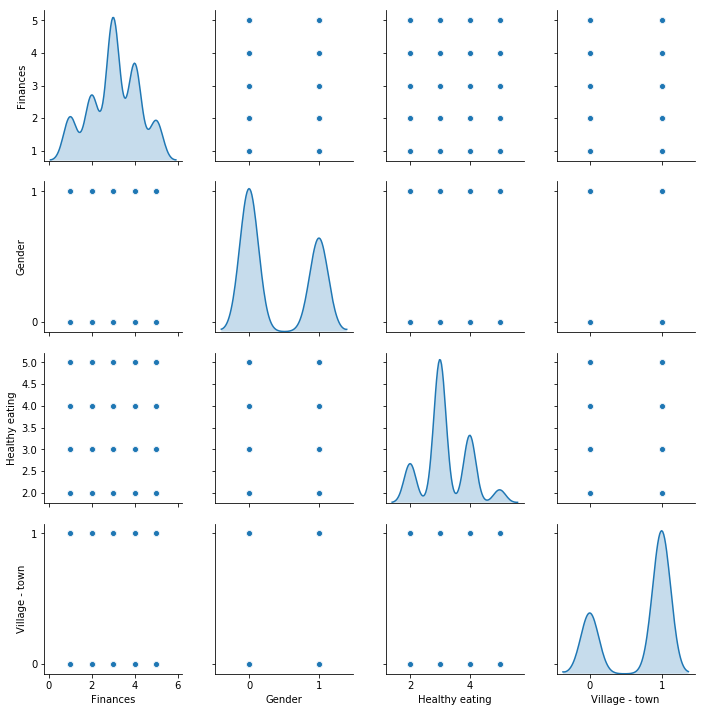

In [11]:
#female = 0
#male = 1
#city = 1
#village = 0

resp_final['Gender'].replace(['female'],'0',inplace=True)
resp_final['Gender'].replace(['male'],'1',inplace=True)
resp_original=resp_final;
resp_final['Village - town'].replace(['village','city'],['0','1'],inplace=True)
sns.pairplot( resp_final , diag_kind='kde')

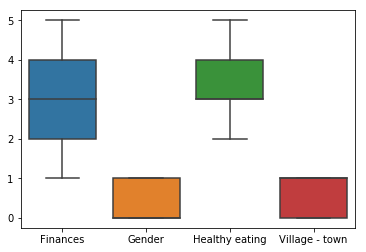

In [12]:
sns.boxplot(data=resp_final)

We can see the outliers in Healthy eating


        Hypothesis Testing - Case I : Is saving money (finances) gender dependant?
                            Case II : Is there any differences in money saving (finances) between people from city or village?


In [ ]:
print('H0 : 𝜇MaleFinance = 𝜇FemaleFinance , not gender dependent')
print('𝐻 𝐴   : 𝜇MaleFinance != 𝜇FemaleFinance , Gender dependent')


In [21]:
df_fin_v=resp_original[resp_original['Village - town']=='village'].sample(20)['Finances']

df_fin_c=resp_original[resp_original['Village - town']=='city'].sample(20)['Finances']

In [22]:
df_fin_v.describe()


count    20.000000
mean      3.000000
std       1.486784
min       1.000000
25%       2.000000
50%       3.000000
75%       4.250000
max       5.000000
Name: Finances, dtype: float64

In [23]:
df_fin_c.describe()

count    20.000000
mean      3.100000
std       1.071153
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Finances, dtype: float64

In [24]:
t_statistic, p_value  =  stats.ttest_ind(df_fin_v,df_fin_c)
print('P Value %1.3f' % p_value) 

P Value 0.809


In [ ]:
print('p-value 0.140 > 0.05, Accept Alternate Hypothesis at 5% level of significance')
print('We dont have sufficient effidence to prove that Saving money is village or city dependent')

Inorder to prove further or more stronger , I have chosen two way ANOVA approach


The null hypotheses for each of the sets are given below.

 There is no interaction between the two factors - Gender and Village/City for finances
    
Alternative Hypothesis:

 There is an interaction between the two factors - Gender and Village/City for finances



In [25]:
df_fin_fc=resp_final[(resp_final['Gender']=='female') & (resp_final['Village - town']=='city')].sample(10)[['Finances','Gender','Village - town']]
df_fin_fv=resp_final[(resp_final['Gender']=='female') & (resp_final['Village - town']=='village')].sample(10)[['Finances','Gender','Village - town']]
df_fin_mc=resp_final[(resp_final['Gender']=='male') & (resp_final['Village - town']=='city')].sample(10)[['Finances','Gender','Village - town']]
df_fin_mv=resp_final[(resp_final['Gender']=='male') & (resp_final['Village - town']=='village')].sample(10)[['Finances','Gender','Village - town']]

In [26]:

df_final1=pd.DataFrame()
df_final1=df_final1.append(df_fin_mc)
df_final1=df_final1.append(df_fin_mv)
df_final1=df_final1.append(df_fin_fc)
df_final1=df_final1.append(df_fin_fv)

df_final=df_final1['Gender'].replace(['female'],'0',inplace=True)
df_final=df_final1['Gender'].replace(['male'],'1',inplace=True)
df_final=df_final1['Village - town'].replace(['city'],'1',inplace=True)
df_final=df_final1['Village - town'].replace(['village'],'0',inplace=True)


In [28]:
df_final1.columns=['Finances','Gender','VT']
df_final1

,Finances,Gender,VT
394,3.0,1,1
646,3.0,1,1
729,3.0,1,1
739,4.0,1,1
610,3.0,1,1
641,4.0,1,1
471,1.0,1,1
702,3.0,1,1
749,3.0,1,1
76,2.0,1,1


In [31]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula = 'Finances ~ C(VT) + C(Gender) + C(VT):C(Gender)'
model = ols(formula, df_final1).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

                 sum_sq    df         F    PR(>F)
C(VT)             2.025   1.0  2.256966  0.141736
C(Gender)         0.025   1.0  0.027864  0.868364
C(VT):C(Gender)   0.625   1.0  0.696594  0.409435
Residual         32.300  36.0       NaN       NaN


    Answer for Case 1 & 2 : 
    Is saving money (finances) gender dependant?
    Is there any differences in money saving (finances) between people from city or village?

 p-value => 0.435 > 5 % (significance level) - Accept Null Hypothesis , There's o sufficient eveidence to prove that Finances depends upon Gender and Village/City



Case 3:  Do Women have a Healthier Lifestyle than Men?


In [32]:
# Hypothesis Testing
## H0 :  μM  -  μF  = 0 - Both men and women are having similar healthier lifestyle
## HA :  μM  -  μF   ≠≠  0 - There's difference in their lifestyle 
    
    
df_health_f=resp_original[resp_original['Gender']=='female'].sample(30)['Healthy eating']

df_health_m=resp_original[resp_original['Gender']=='male'].sample(30)['Healthy eating']


t_statistic, p_value  =  stats.ttest_ind(df_health_m,df_health_f)
print('P Value %1.3f' % p_value) 

P Value 0.163


p- value : 0.452>0.05 , Accept NUll Hypothesis , there's no eveidence to prove that Women have a healthier life style than men

Case 4: Are Village People Healthier than City People?
    

In [33]:
## H0 :  μM  -  μF  = 0 - Both village  and city people are having similar healthier lifestyle
## HA :  μM  -  μF   ≠≠  0 - There's difference in their lifestyle 
    
    
df_health_v=resp_original[resp_original['Village - town']=='village'].sample(30)['Healthy eating']

df_health_c=resp_original[resp_original['Village - town']=='village'].sample(30)['Healthy eating']


t_statistic, p_value  =  stats.ttest_ind(df_health_v,df_health_c)
print('P Value %1.3f' % p_value) 

P Value 0.636


In [ ]:
p- value : 0.862>0.05 , Accept NUll Hypothesis , there's no eveidence to prove that Village people have a healthier life style than city people